# Adding new samples to an existing embedding

This notebook demonstrates how to embed new, unseen samples into an existing t-SNE embedding. Basic usage is described in detail in `simple_usage.ipynb`, so a lot of details on t-SNE are skipped here.

In [1]:
from fastTSNE import TSNE
from fastTSNE.callbacks import ErrorLogger

from examples import utils

import numpy as np
import scipy.sparse as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### Load data

In [2]:
x, y = utils.get_zeisel_2018()

# x and y have the following data types
x: sp.spmatrix
y: np.ndarray

In [3]:
print('Data set contains %d samples with %d features' % x.shape)

Data set contains 160796 samples with 27932 features


### Create train/test split

We'll split our data set into a training and test sets, as is typically done in most machine learning settings. The test set represents new data that wasn't available at runtime.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [5]:
print('%d training samples' % x_train.shape[0])
print('%d test samples' % x_test.shape[0])

112557 training samples
48239 test samples


### SVD preprocessing

In [6]:
svd = TruncatedSVD(n_components=50)

In [7]:
%time x_train_prime = svd.fit_transform(x_train)

CPU times: user 1min 18s, sys: 8.03 s, total: 1min 26s
Wall time: 1min 15s


### t-SNE

In [8]:
tsne = TSNE(n_components=2, negative_gradient_method='fft', neighbors='approx',
            callbacks=ErrorLogger(), n_jobs=8)

In [9]:
%time embedding_train = tsne.fit(x_train_prime)

Iteration   50, KL divergence  8.0069, 50 iterations in 3.4162 sec
Iteration  100, KL divergence  7.1372, 50 iterations in 4.4937 sec
Iteration  150, KL divergence  6.3662, 50 iterations in 3.6692 sec
Iteration  200, KL divergence  5.9242, 50 iterations in 3.6308 sec
Iteration  250, KL divergence  5.6454, 50 iterations in 3.7503 sec
Iteration   50, KL divergence  5.4838, 50 iterations in 3.7570 sec
Iteration  100, KL divergence  5.2199, 50 iterations in 3.8381 sec
Iteration  150, KL divergence  4.9411, 50 iterations in 3.8216 sec
Iteration  200, KL divergence  4.6812, 50 iterations in 3.7678 sec
Iteration  250, KL divergence  4.4532, 50 iterations in 3.8984 sec
Iteration  300, KL divergence  4.2569, 50 iterations in 4.0264 sec
Iteration  350, KL divergence  4.0875, 50 iterations in 4.2840 sec
Iteration  400, KL divergence  3.9409, 50 iterations in 4.9860 sec
Iteration  450, KL divergence  3.8136, 50 iterations in 5.1635 sec
Iteration  500, KL divergence  3.7015, 50 iterations in 4.5478

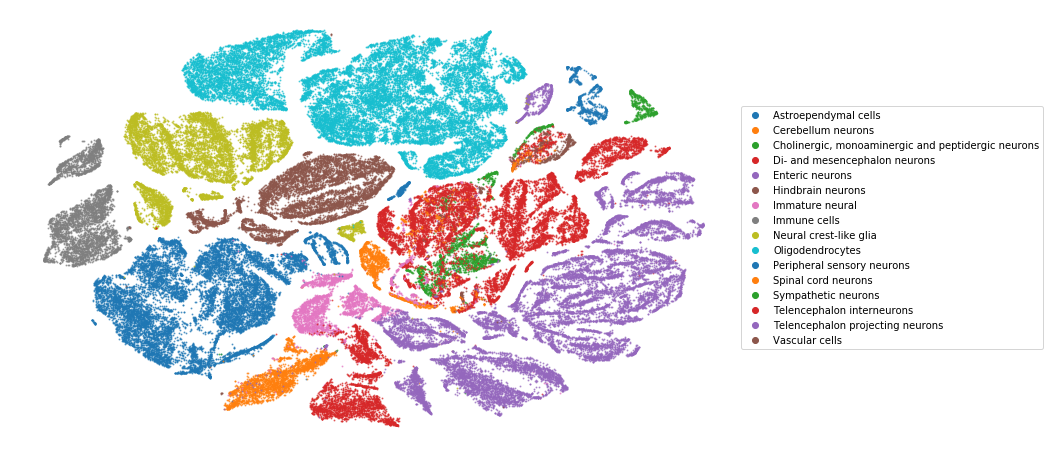

In [10]:
fig = plt.figure(figsize=(13, 8))
utils.plot(embedding_train, y_train, ax=fig.gca())

### Embedding new samples

First, we need to project the test data into the same reduced space as the training data.

In [11]:
%time x_prime_test = svd.transform(x_test)

CPU times: user 2.52 s, sys: 6.63 ms, total: 2.53 s
Wall time: 2.54 s


Now, we can add samples from the reduced representations to our embedding and optimize for a couple hundred iterations.

In [12]:
%time embedding_test = embedding_train.transform(x_prime_test)

Iteration   50, KL divergence  3.6495, 50 iterations in 7.5870 sec
Iteration  100, KL divergence  3.5962, 50 iterations in 7.0413 sec
Iteration   50, KL divergence  3.5904, 50 iterations in 6.4644 sec
Iteration  100, KL divergence  3.5823, 50 iterations in 6.7366 sec
Iteration  150, KL divergence  3.5761, 50 iterations in 4.1798 sec
Iteration  200, KL divergence  3.5721, 50 iterations in 5.2012 sec
Iteration  250, KL divergence  3.5693, 50 iterations in 5.2215 sec
Iteration  300, KL divergence  3.5673, 50 iterations in 5.4860 sec
CPU times: user 2min 22s, sys: 426 ms, total: 2min 23s
Wall time: 55.1 s


Let's plot the newly embedded data.

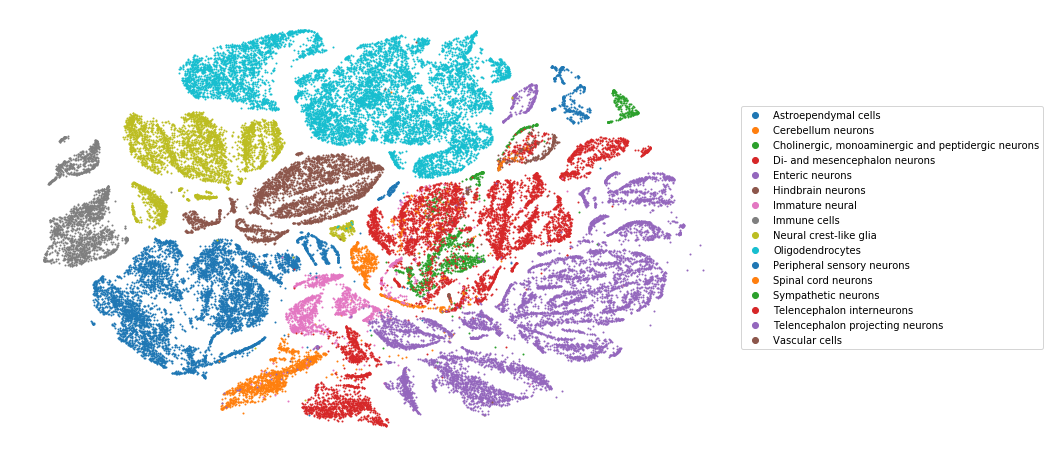

In [13]:
fig = plt.figure(figsize=(13, 8))
utils.plot(embedding_test, y_test, ax=fig.gca(), alpha=1)

Looks familliar, doesn't it? If we compare this to the above plot, we can see that the colors match up.

We superimpose the embedded test samples over the training samples in the hope that the correspondence will be even clearer. We plot the training samples with high transparency, and the test samples with no transparency so hopefully, they stand out a bit more.

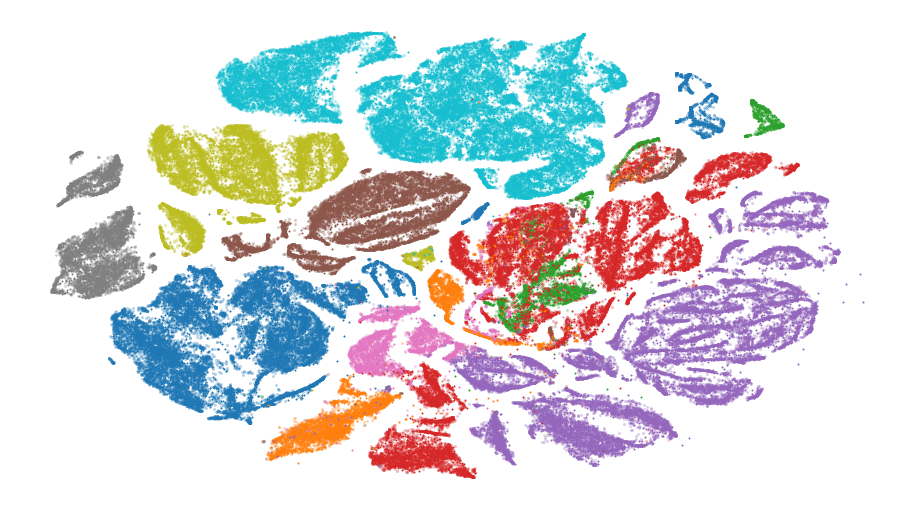

In [14]:
fig = plt.figure(figsize=(16, 9))
utils.plot(embedding_train, y_train, ax=fig.gca(), alpha=0.25, ms=2, draw_legend=False)
plt.gca().set_prop_cycle(None)
utils.plot(embedding_test, y_test, ax=fig.gca(), alpha=1, draw_legend=False)